# 분포함수
- 개념적 이해 필요 : 논문 해석
- 테이블 데이터 전처리 등에서는 사용치 않음

In [1]:
import random 
import pandas as pd
import numpy as np

import os

import seaborn as sns
import scipy

In [2]:
def get_coin_info():
    return random.choice(['H', 'T'])

In [3]:
samples = list()
for _ in range(1000):
    samples.append("".join([get_coin_info() for x in range(3)]))

In [4]:
samples[:4]

['HTT', 'HHH', 'HTT', 'TTH']

In [5]:
from collections import Counter

In [6]:
Counter(samples)

Counter({'HTT': 140,
         'HHH': 141,
         'TTH': 114,
         'HHT': 119,
         'THH': 130,
         'THT': 126,
         'TTT': 124,
         'HTH': 106})

In [7]:
# 특정 값이 들어갔을 때 head가 몇 번 나왔는지 확인
# 확률 변수
def coin_random_func(coin_sample):
    return coin_sample.count("H")

In [8]:
df = pd.DataFrame(samples, columns=['sample'])
df.head()

,sample
0,HTT
1,HHH
2,HTT
3,TTH
4,HHT


In [9]:
df['random_var'] = df['sample'].map(coin_random_func)

In [10]:
df['random_var'].value_counts()

1    380
2    355
3    141
0    124
Name: random_var, dtype: int64

In [11]:
df['random_var'].value_counts(normalize=True)

1    0.380
2    0.355
3    0.141
0    0.124
Name: random_var, dtype: float64

# 확률분포함수

In [12]:
df['random_var'].value_counts(normalize=True).sort_index()

0    0.124
1    0.380
2    0.355
3    0.141
Name: random_var, dtype: float64

<AxesSubplot:>

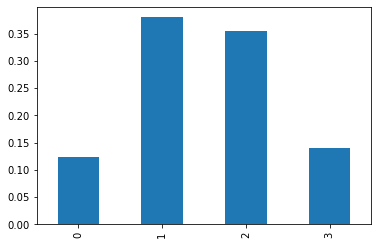

In [13]:
df['random_var'].value_counts(normalize=True).sort_index().plot.bar()

<AxesSubplot:>

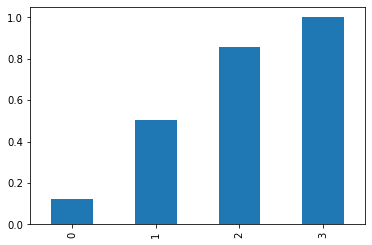

In [14]:
# 누적 분포 

result = df['random_var'].value_counts(normalize=True).sort_index()
result.cumsum().plot.bar()

In [15]:
os.listdir('data')

['StudentsPerformance.csv']

In [16]:
df = pd.read_csv(os.path.join('data', 'StudentsPerformance.csv'))
df.shape

(1000, 8)

<AxesSubplot:ylabel='Density'>

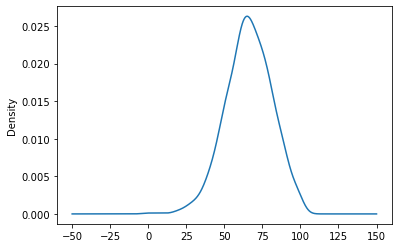

In [17]:
# 연속형
df['math score'].plot.kde()

<AxesSubplot:ylabel='Frequency'>

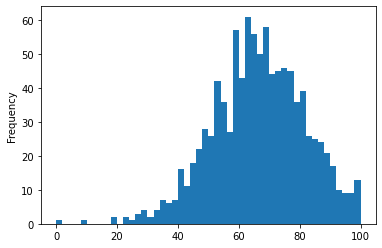

In [18]:
# 연속형
# xlabels => 확률 변수 
# 표현 값이 확률
df['math score'].plot.hist(bins=50)

/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

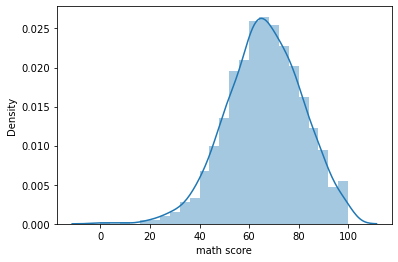

In [19]:
# 분포 밀집도를 estimate 해서 보여줌
sns.distplot(df['math score'])

/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

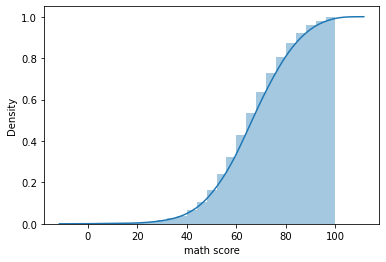

In [20]:
# 누적
kwargs = {'cumulative' : True}
sns.distplot(df['math score'],
            hist_kws = kwargs,
            kde_kws = kwargs)

<AxesSubplot:xlabel='math score', ylabel='Density'>

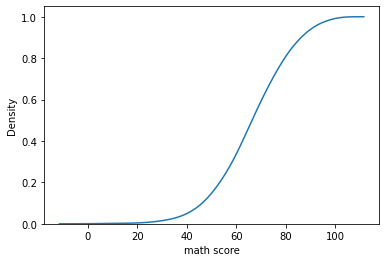

In [21]:
sns.kdeplot(df['math score'], cumulative=True)